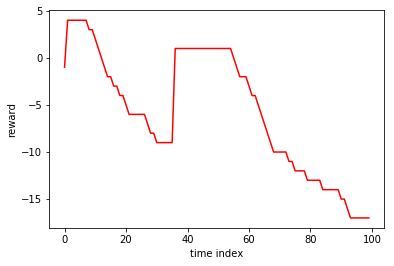

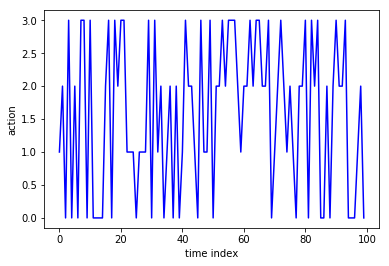

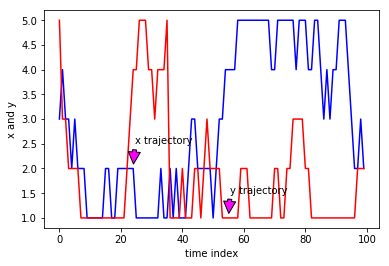

In [2]:
"""Grid World task"""
from gym import core, spaces
import numpy as np
from time import sleep
import matplotlib.pyplot as plt

__copyright__ = "Copyleft"
__license__ = "None"
__author__ = "Alireza Askarian <askaria2@illinois.edu>"

class GridWorld(core.Env):

    """
    Describtion goes here
    """

    metadata = {
        'render.modes': ['human', 'rgb_array'],
        'video.frames_per_second' : 15
    }

    def __init__(self):
        self.viewer = None
        #position in 5x5 grid world
        self.position = spaces.Tuple([spaces.Discrete(7), spaces.Discrete(7)])
        #initialize position
        self.position = np.array([1, 1])
        #set A, A' and B, B' position on grid
        self.A = np.array([2, 5])
        self.A_prime = np.array([2, 1])
        self.B = np.array([4, 5])
        self.B_prime = np.array([4, 3])
        #set observation to position 
        self.observation_space = self.position
        #West, North, East, South
        self.action_space = spaces.Discrete(4)
        #define reward
        self.reward = 0
        self.state = np.array(self.position)

    def reset(self):
        self.position = np.random.randint(1, high = 6, size=2)
        self.reward = 0
        return self._get_ob()

    def step(self, a):
        #save old position
        position_old = np.array(self.position)

        #action effect
        if  a == 0:
            self.position[0] = self.position[0] - 1
        elif a == 1:
            self.position[1] = self.position[1] + 1
        elif a == 2:
            self.position[0] = self.position[0] + 1
        elif a == 3:
            self.position[1] = self.position[1] - 1

        #check for grid boundary constraint
        if (self.position[0] < 1) or (self.position[0] > 5):
            self.position[:] = position_old[:]
            self.reward = self.reward - 1
        if (self.position[1] < 1) or (self.position[1] > 5):
            self.position[:] = position_old[:]
            self.reward = self.reward - 1

        #hyper-jump check
        if (self.position == self.A).all():
            self.position[:] = self.A_prime[:]
            self.reward = self.reward + 10
        if (self.position == self.B).all():
            self.position[:] = self.B_prime[:]
            self.reward = self.reward + 5

        self.state[:] = self.position[:]
        return self.state, self.reward

    def _get_ob(self):
        return self.state

    def render(self, mode='human'):
        #set window width and height
        screen_width = 500
        screen_height = 500
        scale = 100

        if self.viewer is None:
            from gym.envs.classic_control import rendering
            self.viewer = rendering.Viewer(screen_width, screen_height)
            for i in range(6):
                line_v = np.array([i*scale, 0, i*scale, 5*scale])
                line_h = np.array([0, i*scale, 5*scale, i*scale])
                line = self.viewer.draw_line((line_v[0], line_v[1]), (line_v[2], line_v[3]))
                self.viewer.add_geom(line)
                line = self.viewer.draw_line((line_h[0], line_h[1]), (line_h[2], line_h[3]))
                self.viewer.add_geom(line)
            agent_size = 30
            left, right, top, bottom = -agent_size, +agent_size, +agent_size, -agent_size
            agent = rendering.FilledPolygon([(left, bottom), (left, top), (right, top), (right, bottom)])
            self.agent_trans = rendering.Transform()
            agent.add_attr(self.agent_trans)
            agent.set_color(1, 0, 0)
            self.viewer.add_geom(agent)
        if self.state is None:
            return None

        self.agent_trans.set_translation((self.position[0]-0.5)*100, (self.position[1]-0.5)*100)

        return self.viewer.render(return_rgb_array=mode == 'rgb_array')


    def close(self):
        if self.viewer:
            self.viewer.close()

env = GridWorld()

episode_num = 1
time_horizon = 100

reward_vector = np.zeros(time_horizon)
pos_x = np.zeros(time_horizon)
pos_y = np.zeros(time_horizon)
action_vector = np.zeros(time_horizon)
T = np.zeros(time_horizon)

for i_episode in range(episode_num):
    observation = env.reset()
    for t in range(time_horizon):
        env.render()
        action = env.action_space.sample()
        observation, reward = env.step(action)

        reward_vector[t] = reward
        action_vector[t] = action
        pos_x[t] = observation[0]
        pos_y[t] = observation[1]
        T[t] = t
    env.close()


plt.plot(T, reward_vector, 'r')
plt.ylabel('reward')
plt.xlabel('time index')
plt.show()

plt.plot(T, action_vector, 'b')
plt.ylabel('action')
plt.xlabel('time index')
plt.show()

plt.plot(T, pos_x, 'b')
plt.plot(T, pos_y, 'r')
plt.annotate('x trajectory', xy=(T[24]+0.05, pos_x[24]+0.05), xytext=(T[24]+0.5, pos_x[24]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.annotate('y trajectory', xy=(T[55]+0.05, pos_y[55]+0.05), xytext=(T[55]+0.5, pos_y[55]+0.5), arrowprops=dict(facecolor='magenta', shrink=0.1),)
plt.ylabel('x and y')
plt.xlabel('time index')
plt.show()
